In [1]:
# Q1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


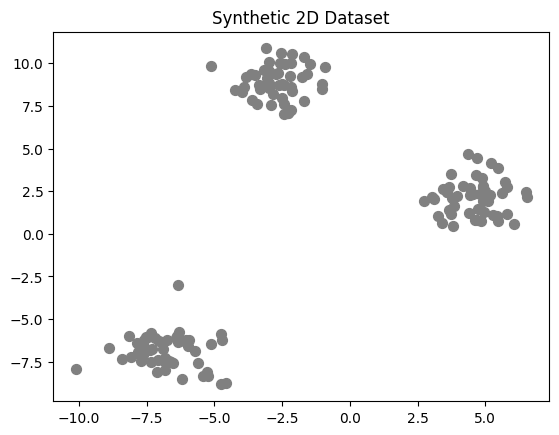

In [2]:
# Q1. Generate 2D dataset with 3 clusters
X, y_true = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)
plt.scatter(X[:,0], X[:,1], c='gray', s=50)
plt.title("Synthetic 2D Dataset")
plt.show()


In [3]:
# Q1. Apply Fuzzy C-Means
X_T = X.T  # skfuzzy expects shape = (features, samples)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_T, c=3, m=2, error=0.005, maxiter=1000, init=None
)
print("FPC (Fuzzy Partition Coefficient):", fpc)


FPC (Fuzzy Partition Coefficient): 0.9568366965412857


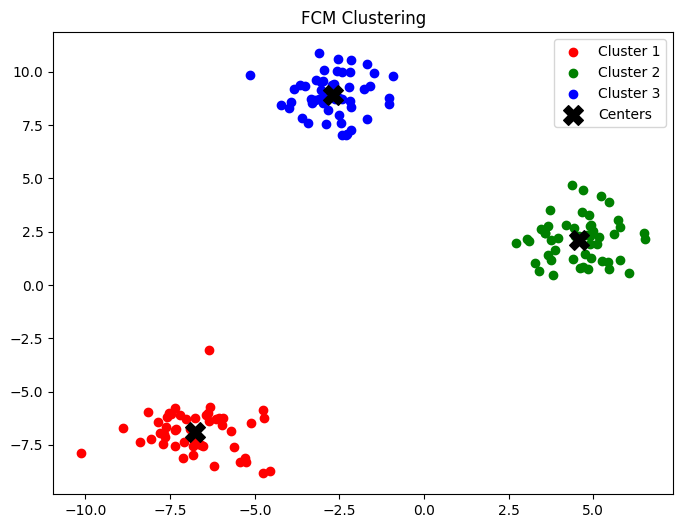

In [4]:
# Q1. Plot clustered data points & cluster centers
cluster_labels = np.argmax(u, axis=0)
plt.figure(figsize=(8,6))
colors = ['r','g','b']
for i in range(3):
    plt.scatter(X[cluster_labels==i,0], X[cluster_labels==i,1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(cntr[:,0], cntr[:,1], color='k', marker='X', s=200, label='Centers')
plt.title("FCM Clustering")
plt.legend()
plt.show()


In [5]:
# Q1. Display membership values for 5 random points
np.random.seed(42)
sample_indices = np.random.choice(X.shape[0], 5, replace=False)
for idx in sample_indices:
    print(f"Point {X[idx]} membership:", u[:,idx])


Point [-2.42215055  8.71527878] membership: [4.38695763e-04 1.24729387e-03 9.98314010e-01]
Point [4.89037169 2.31961789] membership: [5.96307645e-04 9.98100387e-01 1.30330502e-03]
Point [-10.12089453  -7.90449723] membership: [0.93013292 0.03603943 0.03382765]
Point [3.7204546  3.52310409] membership: [0.01166903 0.95201749 0.03631348]
Point [3.40292813 0.65271307] membership: [0.0210703  0.94685761 0.03207209]


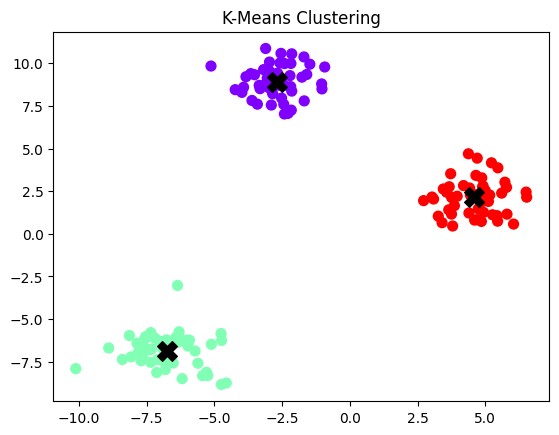

In [6]:
# Q1. Compare with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='k', marker='X', s=200)
plt.title("K-Means Clustering")
plt.show()


In [7]:
# Q2. Import libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler


In [8]:
# Q2. Load Iris dataset & normalize
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_iris)


In [9]:
# Q2. Apply FCM
X_T = X_norm.T
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(X_T, c=3, m=2, error=0.005, maxiter=1000)
print("FPC for Iris:", fpc)


FPC for Iris: 0.7424834027595703


In [10]:
# Q2. Predicted clusters for first 20 samples
cluster_labels = np.argmax(u, axis=0)
print("Predicted clusters (first 20 samples):", cluster_labels[:20])
print("Actual labels:", y_iris[:20])


Predicted clusters (first 20 samples): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
from scipy.stats import mode
import numpy as np

labels_map = []
for i in range(3):
    mask = cluster_labels == i
    if np.sum(mask) > 0:
        majority = mode(y_iris[mask], keepdims=True).mode[0]
        labels_map.append(majority)
    else:
        labels_map.append(-1)

mapped_labels = np.array([labels_map[i] for i in cluster_labels])
accuracy = np.mean(mapped_labels == y_iris)
print("FCM Accuracy:", accuracy)


FCM Accuracy: 0.8866666666666667


In [12]:
# Q2. Compare with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_norm)
accuracy_kmeans = np.mean(kmeans_labels == y_iris)  # direct mapping may not match species
print("K-Means accuracy (approx):", accuracy_kmeans)


K-Means accuracy (approx): 0.05333333333333334


In [13]:
# Q3. Import libraries
from skimage import io, color


In [18]:
import os
import numpy as np
from PIL import Image

# Define path
image_path = r"E:\University\Semster 5\AI Lab\venv\Lib\flowergreyscale.png"

if os.path.exists(image_path):
    # Load and convert to grayscale ('L' mode) in one line
    img = Image.open(image_path).convert('L')
    
    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0
    
    # Flatten to 1D array
    pixels = img_array.flatten().reshape(1, -1)
    
    print(f"Success! Matrix shape: {pixels.shape}")
else:
    print("Error: Image not found.")

Success! Matrix shape: (1, 810000)


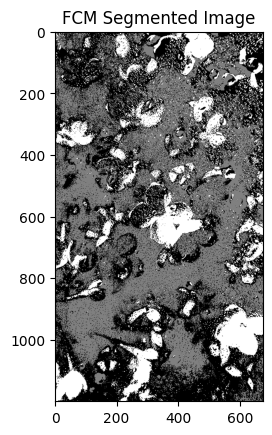

In [19]:
# Q3. Apply FCM (3 clusters)
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(pixels, c=3, m=2, error=0.005, maxiter=1000)
cluster_labels = np.argmax(u, axis=0)
segmented = cluster_labels.reshape(img_gray.shape)

plt.imshow(segmented, cmap='gray')
plt.title("FCM Segmented Image")
plt.show()


In [20]:
# Q4. Create small customer dataset
customers = np.array([
    [25, 50000, 30],
    [40, 80000, 70],
    [22, 30000, 20],
    [35, 60000, 60],
    [28, 45000, 50],
    [45, 90000, 80],
    [32, 55000, 55],
    [38, 75000, 65],
    [30, 40000, 40],
    [50, 100000, 90]
])

scaler = MinMaxScaler()
customers_norm = scaler.fit_transform(customers)


In [21]:
# Q4. Apply FCM with 3 clusters
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(customers_norm.T, c=3, m=2, error=0.005, maxiter=1000)
cluster_labels = np.argmax(u, axis=0)
print("Membership matrix (u):\n", u)
print("Cluster centers (normalized):\n", cntr)
print("FPC:", fpc)


Membership matrix (u):
 [[0.01165931 0.37267307 0.03198232 0.00996196 0.03673804 0.96430963
  0.04372209 0.11249755 0.01764089 0.94590145]
 [0.04820802 0.56531896 0.09454637 0.97309558 0.24117013 0.02895425
  0.76367401 0.84265662 0.09237858 0.04052039]
 [0.94013267 0.06200797 0.87347131 0.01694245 0.72209183 0.00673613
  0.1926039  0.04484582 0.88998053 0.01357816]]
Cluster centers (normalized):
 [[0.8862914  0.90855534 0.90885759]
 [0.48312697 0.49774206 0.58584199]
 [0.14968177 0.1647525  0.19920713]]
FPC: 0.7624955627843804


In [22]:
# Q4. Assign each customer to cluster with max membership
for i, c in enumerate(cluster_labels):
    print(f"Customer {i+1} assigned to Cluster {c+1}")


Customer 1 assigned to Cluster 3
Customer 2 assigned to Cluster 2
Customer 3 assigned to Cluster 3
Customer 4 assigned to Cluster 2
Customer 5 assigned to Cluster 3
Customer 6 assigned to Cluster 1
Customer 7 assigned to Cluster 2
Customer 8 assigned to Cluster 2
Customer 9 assigned to Cluster 3
Customer 10 assigned to Cluster 1


In [27]:

file_path = 'covid_19.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)

    # Countries list
    countries = ['Pakistan', 'India', 'China', 'Iran', 'Afghanistan']

    # Using the correct column names based on your output
    # Removed 'Population' because it's not in your CSV
    try:
        df_sel = df[df['Country/Region'].isin(countries)][['Country/Region', 'Confirmed', 'Deaths']]
        
        print("Success! Filtered Data:")
        print(df_sel)
    except KeyError as e:
        print(f"Still getting an error: {e}")
else:
    print("CSV file not found!")

Success! Filtered Data:
    Country/Region  Confirmed  Deaths
0      Afghanistan      36263    1269
36           China      86783    4656
79           India    1480073   33408
81            Iran     293606   15912
128       Pakistan     274289    5842


In [29]:
scaler = MinMaxScaler()
X_covid = scaler.fit_transform(df_sel[['Confirmed', 'Deaths']])

print("Normalization successful!")
print("Scaled Data (First 5 rows):\n", X_covid[:5])

Normalization successful!
Scaled Data (First 5 rows):
 [[0.         0.        ]
 [0.03499075 0.10538598]
 [1.         1.        ]
 [0.17823883 0.45561467]
 [0.16485964 0.14228819]]


In [30]:
# FCM with 2 clusters
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(X_covid.T, c=2, m=2, error=0.005, maxiter=1000)
cluster_labels = np.argmax(u, axis=0)
for i, country in enumerate(countries):
    print(f"{country} → Cluster {cluster_labels[i]+1}, Memberships: {u[:,i]}")
print("FPC:", fpc)


Pakistan → Cluster 1, Memberships: [0.98228223 0.01771777]
India → Cluster 1, Memberships: [0.99605265 0.00394735]
China → Cluster 2, Memberships: [4.31290459e-05 9.99956871e-01]
Iran → Cluster 1, Memberships: [0.9123048 0.0876952]
Afghanistan → Cluster 1, Memberships: [0.99585438 0.00414562]
FPC: 0.9577952281263837


In [31]:
# Compare with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_covid)
for i, country in enumerate(countries):
    print(f"{country} → KMeans Cluster {kmeans_labels[i]+1}")


Pakistan → KMeans Cluster 1
India → KMeans Cluster 1
China → KMeans Cluster 2
Iran → KMeans Cluster 1
Afghanistan → KMeans Cluster 1
